In [59]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

In [61]:
import sys
sys.path.append('../..')

# Read in the QMC Data

In [62]:
from stag_mag import calculate_stag_mag
from dset_helpers import load_KZ_QMC_uncorr_data,load_KZ_QMC_uncorr_data_from_batches

In [12]:
df = pd.read_csv('./../../../QMC_data/avg_observables.csv', sep=',')
deltas = np.array(df["delta"])
energies = np.array(df["energy"])
e_errors = np.array(df["energy_error"])
chks = np.array(df["chk"])
chk_errors = np.array(df["chk_error"])

In [15]:
deltas_lim = np.array([-1.545,4.455,4.955,13.455])
stagmags = []
lim_stagmags = []
for delta in deltas_lim:
    data = np.load(f"./../../../QMC_data/all_samples/delta_{delta}/all_samples_delta_{delta}.npy")
    lim_data = load_KZ_QMC_uncorr_data(delta,1000)
    stagmags.append(calculate_stag_mag(16,16,data)[2])
    lim_stagmags.append(calculate_stag_mag(16,16,lim_data)[2])
stagmags = np.array(stagmags)
lim_stagmags = np.array(lim_stagmags)

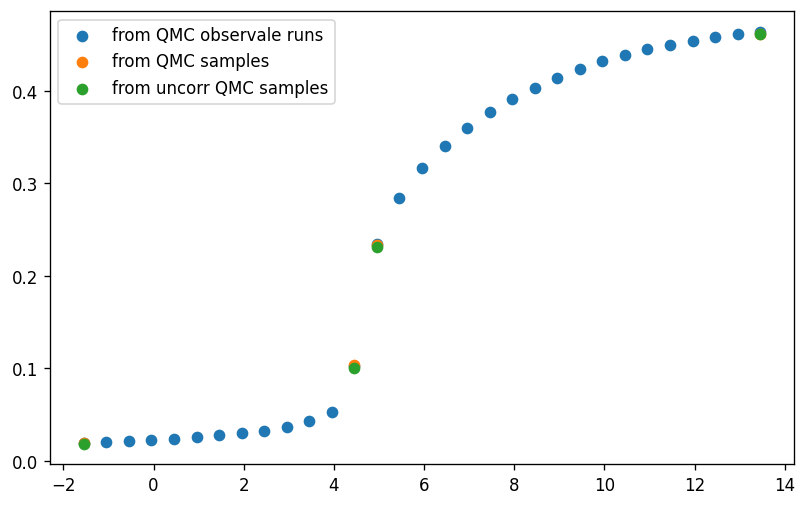

In [17]:
fig = plt.figure(1,figsize=(8,5), dpi=120, facecolor='w', edgecolor='k')
plt.scatter(deltas,chks,label='from QMC observale runs')
plt.scatter(deltas_lim,stagmags,label='from QMC samples')
plt.scatter(deltas_lim,lim_stagmags,label='from uncorr QMC samples')
plt.legend()
plt.show()

^ This shows that all the QMC stuff is correct and consistent because we have:
- staggered magnetization calculated in the QMC code
- staggered magnetization calculated from QMC samples but my function
- staggered magnetization calculated from QMC samples *after* all my manipulating/getting uncorrelated samples

# Prep I did before (not relevant anymore)

##### Write load KZ QMC data function 

In [30]:
from dset_helpers import load_KZ_QMC_data

In [31]:
samples_m1545 = load_KZ_QMC_data(-1.545)

In [32]:
samples_4455 = load_KZ_QMC_data(4.455)

In [33]:
samples_4955 = load_KZ_QMC_data(4.955)

In [34]:
samples_13455 = load_KZ_QMC_data(13.455)

##### Sanity Check

In [95]:
from stag_mag import calculate_stag_mag

In [96]:
print(calculate_stag_mag(16,16,samples_13455)[2])

0.46160166114267676


##### Write full data sets to a file

In [35]:
np.save("./../../../QMC_data/all_samples/delta_-1.545/all_samples_delta_-1.545",samples_m1545)
np.save("./../../../QMC_data/all_samples/delta_4.455/all_samples_delta_4.455",samples_4455)
np.save("./../../../QMC_data/all_samples/delta_4.955/all_samples_delta_4.955",samples_4955)
np.save("./../../../QMC_data/all_samples/delta_13.455/all_samples_delta_13.455",samples_13455)

##### New load KZ QMC data function

This function has a data_step parameter which tells us how many to skip before taking the next sample- This should uncorrelate the samples further.

In [101]:
data = np.load("./../../../QMC_data/all_samples/delta_13.455/all_samples_delta_13.455.npy")

In [103]:
print(np.shape(data))

(198000, 256)


In [106]:
indices = np.random.randint(0,high=np.shape(data)[0],size=1000)

In [107]:
uncorr_data = data[indices,:]
print(np.shape(uncorr_data))

(1000, 256)


In [108]:
print(calculate_stag_mag(16,16,uncorr_data)[2])

0.46223828125


##### Test Function

In [110]:
from dset_helpers import load_KZ_QMC_uncorr_data

In [113]:
dataa = load_KZ_QMC_uncorr_data(13.455,1000)

In [114]:
print(calculate_stag_mag(16,16,dataa)[2])

0.461515625


##### Load TF dataset

In [115]:
import tensorflow as tf

In [116]:
from dset_helpers import create_KZ_QMC_tf_dataset

In [120]:
tf_dataset = create_KZ_QMC_tf_dataset(dataa)

In [126]:
dset = tf_dataset.shuffle(len(tf_dataset))
dset = dset.batch(100)

In [127]:
list(dset.as_numpy_iterator())

[array([[1., 0., 1., ..., 1., 0., 1.],
        [0., 1., 0., ..., 0., 1., 0.],
        [1., 0., 1., ..., 1., 0., 1.],
        ...,
        [0., 1., 0., ..., 0., 1., 1.],
        [0., 1., 0., ..., 0., 1., 0.],
        [0., 1., 0., ..., 0., 1., 0.]]),
 array([[1., 0., 1., ..., 1., 0., 1.],
        [0., 1., 0., ..., 0., 1., 0.],
        [0., 1., 0., ..., 0., 1., 0.],
        ...,
        [0., 1., 0., ..., 0., 1., 0.],
        [1., 1., 0., ..., 0., 1., 1.],
        [1., 1., 0., ..., 0., 1., 0.]]),
 array([[1., 0., 1., ..., 0., 1., 0.],
        [0., 1., 0., ..., 0., 1., 0.],
        [0., 1., 0., ..., 0., 1., 0.],
        ...,
        [0., 1., 0., ..., 0., 1., 0.],
        [1., 1., 0., ..., 0., 1., 0.],
        [1., 0., 1., ..., 1., 0., 1.]]),
 array([[1., 0., 1., ..., 0., 1., 0.],
        [1., 0., 1., ..., 1., 0., 1.],
        [0., 1., 0., ..., 0., 0., 1.],
        ...,
        [0., 1., 0., ..., 0., 1., 0.],
        [1., 0., 1., ..., 1., 0., 1.],
        [1., 0., 1., ..., 1., 0., 1.]]),
 arr

# Batch QMC data

In [20]:
from dset_helpers import create_KZ_QMC_tf_dataset

In [18]:
data = np.load("./../../../QMC_data/all_samples/delta_-1.545/all_samples_delta_-1.545.npy")

In [19]:
print(np.shape(data))

(198000, 256)


In [21]:
tf_dataset = create_KZ_QMC_tf_dataset(data)

2023-02-14 13:17:12.663461: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
dset = tf_dataset.shuffle(len(tf_dataset))
dset = dset.batch(40000)

In [25]:
list(dset.as_numpy_iterator())

[array([[1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 1., 0., 1.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 1.]]),
 array([[0., 1., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 1., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        ...,
        [1., 0., 0., ..., 1., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]]),
 arr

In [49]:
deltas_lim = np.array([-1.545,4.455,4.955,13.455])
for delta in deltas_lim:
    print(delta)
    path = f"./../../../QMC_data/all_samples/delta_{delta}/"
    data = np.load(path+f"all_samples_delta_{delta}.npy")
    tf_dataset = create_KZ_QMC_tf_dataset(data)
    dset = tf_dataset.shuffle(len(tf_dataset))
    dset = dset.batch(20000)                                    # I want there to be 10 batches
    for i, batch in enumerate(dset):
        print(i)
        np.save(path+f'all_samples_batch_{i}',batch.numpy())

-1.545
0
1
2
3
4
5
6
7
8
9
4.455
0
1
2
3
4
5
6
7
8
9
4.955
0
1
2
3
4
5
6
7
8
9
13.455
0
1
2
3
4
5
6
7
8
9


# New function for reading in all samples from batches

In [57]:
from dset_helpers import load_KZ_QMC_uncorr_data_from_batches

In [58]:
deltas_lim = np.array([-1.545,4.455,4.955,13.455])
for delta in deltas_lim:
    print(delta)
    path = f"./../../../QMC_data/all_samples/delta_{delta}/"
    uncorr = load_KZ_QMC_uncorr_data_from_batches(delta,1000)
    np.save(path+"uncorr_samples",uncorr)

-1.545
4.455
4.955
13.455
